# DBA: Coding Part

In [110]:
# Numerical Python and Pandas for data manipulation
import numpy as np
import pandas as pd

In [111]:
# Necessary libraries from Sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve

In [112]:
# Algorithms
from sklearn.linear_model import LogisticRegression

In [113]:
# Visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [114]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [115]:
# Load data
data = pd.read_excel("DBA_Dataset.xlsx")

In [116]:
# Sneak peak data
data.head()

,RowNumber,Customer_ID,Rating,Geography,Gender,Age,Tenure,Balance,Products,Credit_Card,Activity,Salary,Exited
0,1,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [117]:
# Data rows vs. columns:
data.shape

(10000, 13)

# Class Distribution

In [118]:
# Calculation class distribution
target_counts = data.groupby('Exited').size()
target_counts

Exited
0    7963
1    2037
dtype: int64

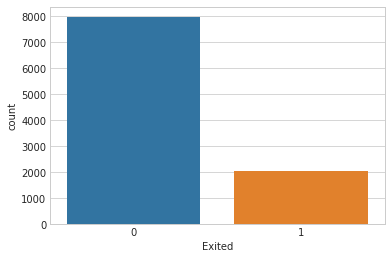

In [119]:
# Visualize class distribution
sns.countplot(x='Exited', data=data)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
RowNumber      10000 non-null int64
Customer_ID    10000 non-null int64
Rating         10000 non-null int64
Geography      10000 non-null object
Gender         10000 non-null object
Age            9368 non-null float64
Tenure         10000 non-null int64
Balance        10000 non-null float64
Products       10000 non-null int64
Credit_Card    10000 non-null int64
Activity       10000 non-null int64
Salary         10000 non-null float64
Exited         10000 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.7+ KB


In [121]:
data.describe()

,RowNumber,Customer_ID,Rating,Age,Tenure,Balance,Products,Credit_Card,Activity,Salary,Exited
count,10000.00000,1.000000e+04,10000.000000,9368.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,39.248719,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.673971,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,38.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis

Text(0.5, 0, 'Excited')

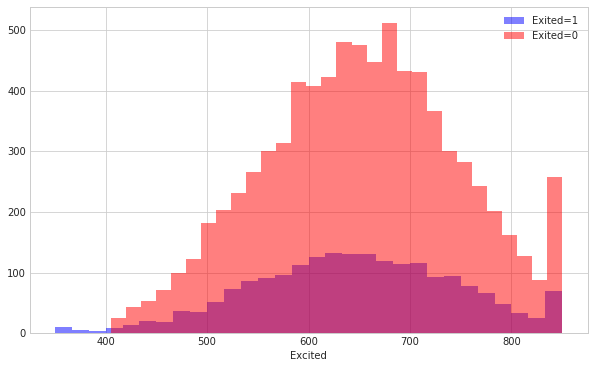

In [122]:
plt.figure(figsize=(10,6))
data[data['Exited']==1]['Rating'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Exited=1')
data[data['Exited']==0]['Rating'].hist(alpha=0.5,color='red',
                                              bins=30,label='Exited=0')
plt.legend()
plt.xlabel('Excited')

Text(0.5, 0, 'Excited')

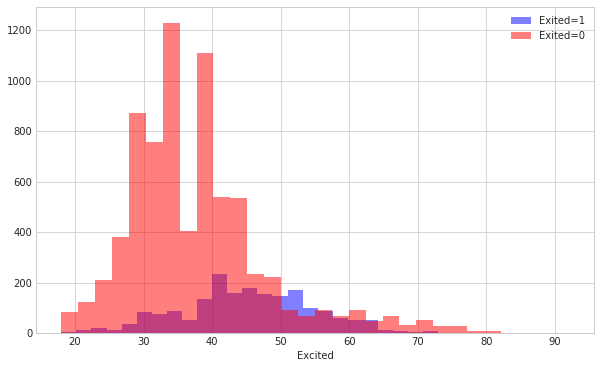

In [123]:
plt.figure(figsize=(10,6))
data[data['Exited']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Exited=1')
data[data['Exited']==0]['Age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Exited=0')
plt.legend()
plt.xlabel('Excited')

In [124]:
# How many customers have churned with a Balance >= mean?
data[(data['Exited']== 1) & (data['Balance'] >= 97198.54)].count()

RowNumber      1249
Customer_ID    1249
Rating         1249
Geography      1249
Gender         1249
Age            1206
Tenure         1249
Balance        1249
Products       1249
Credit_Card    1249
Activity       1249
Salary         1249
Exited         1249
dtype: int64

In [125]:
# How many customers have churned with a Salary >= mean?
data[(data['Exited']== 1) & (data['Salary'] >= 100193.915)].count()

RowNumber      1042
Customer_ID    1042
Rating         1042
Geography      1042
Gender         1042
Age            1010
Tenure         1042
Balance        1042
Products       1042
Credit_Card    1042
Activity       1042
Salary         1042
Exited         1042
dtype: int64

In [126]:
# How many customers have churned with a Tanure >= mean?
data[(data['Exited']== 1) & (data['Tenure'] >= 5)].count()

RowNumber      1093
Customer_ID    1093
Rating         1093
Geography      1093
Gender         1093
Age            1054
Tenure         1093
Balance        1093
Products       1093
Credit_Card    1093
Activity       1093
Salary         1093
Exited         1093
dtype: int64

In [127]:
# Let's look at two cases:
data.loc[9981:9982,:]

,RowNumber,Customer_ID,Rating,Geography,Gender,Age,Tenure,Balance,Products,Credit_Card,Activity,Salary,Exited
9981,9982,15672754,498,Germany,Male,42.0,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,655,Germany,Female,46.0,7,137145.12,1,1,0,115146.40,1


In [128]:
# Are there differences in churn between Female and Male?
data[(data['Gender'] == 'Female') & (data['Exited'] == 1)].count()

RowNumber      1139
Customer_ID    1139
Rating         1139
Geography      1139
Gender         1139
Age            1102
Tenure         1139
Balance        1139
Products       1139
Credit_Card    1139
Activity       1139
Salary         1139
Exited         1139
dtype: int64

In [129]:
# Are there differences in churn between Female and Male?
data[(data['Gender'] == 'Male') & (data['Exited'] == 1)].count()

RowNumber      898
Customer_ID    898
Rating         898
Geography      898
Gender         898
Age            867
Tenure         898
Balance        898
Products       898
Credit_Card    898
Activity       898
Salary         898
Exited         898
dtype: int64

# Identify Highly Correlated Features

In [104]:
corr_matrix = data.corr().abs()

In [105]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [106]:
upper

,RowNumber,Customer_ID,Rating,Gender,Age,Tenure,Balance,Products,Credit_Card,Activity,Salary,Exited,NAN_Age
RowNumber,NaN,0.004202,0.005840,0.018196,0.001460,0.006495,0.009067,0.007246,0.000599,0.012044,0.005988,0.016571,0.012164
Customer_ID,NaN,NaN,0.005308,0.002641,0.011161,0.014883,0.012419,0.016972,0.014025,0.001665,0.015271,0.006248,0.016292
Rating,NaN,NaN,NaN,0.002857,0.005515,0.000842,0.006268,0.012238,0.005458,0.025651,0.001384,0.027094,0.002510
Gender,NaN,NaN,NaN,NaN,0.027340,0.014733,0.012087,0.021859,0.005766,0.022544,0.008112,0.106512,0.014954
Age,NaN,NaN,NaN,NaN,NaN,0.008985,0.029580,0.027867,0.011453,0.087875,0.007883,0.280624,0.027046
Tenure,NaN,NaN,NaN,NaN,NaN,NaN,0.012254,0.013444,0.022583,0.028362,0.007784,0.014001,0.010645
Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304180,0.014858,0.010084,0.012797,0.118533,0.013058
Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003183,0.009612,0.014204,0.047820,0.023257
Credit_Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011866,0.009933,0.007138,0.003718
Activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011421,0.156128,0.002020


Comment: no highly correlated (> 0.95) features.

# Problems with Data (I, II, III and IV)
With data, we have four problems:

1 - Missing Data

2 - Outliers (also covers invalid data)

3 - Cardinality

4 - Rare Values

For Logistic Regression, we can't deal with categorical data, so we only focus on 1 + 2

# Missing Data (I)

In [21]:
# NaN's in the data?
data.isnull().sum(axis=0)

RowNumber        0
Customer_ID      0
Rating           0
Geography        0
Gender           0
Age            632
Tenure           0
Balance          0
Products         0
Credit_Card      0
Activity         0
Salary           0
Exited           0
dtype: int64

In [22]:
# Example of NAN
data.iloc[13:14,:]

,RowNumber,Customer_ID,Rating,Geography,Gender,Age,Tenure,Balance,Products,Credit_Card,Activity,Salary,Exited
13,14,15691483,549,France,Female,NaN,5,0.0,2,0,0,190857.79,0


In [23]:
# Return unique values of Series object
data['Age'].unique()

array([42., 41., 39., 43., 44., 50., 29., 27., 31., 24., 34., nan, 35.,
       45., 58., 32., 38., 46., 36., 33., 40., 51., 61., 49., 19., 66.,
       56., 26., 21., 55., 75., 22., 30., 28., 65., 48., 52., 57., 73.,
       47., 54., 72., 20., 67., 79., 62., 53., 80., 59., 68., 23., 60.,
       70., 63., 64., 18., 82., 69., 74., 71., 76., 77., 88., 85., 84.,
       78., 81., 92., 83.])

In [24]:
# Count distinct observations over requested axis (in this case axis = 1 / column)
data['Age'].nunique()

68

In [25]:
# What's the ratio of Female vs. Male?
sex = data.groupby('Gender').size()
sex

Gender
Female    4543
Male      5457
dtype: int64

In [26]:
# Let's slice Gender + Age
data_slice = data.iloc[:,4:6] # slicing only for Gender + Age

In [27]:
# What's the median for Female and Male?
data_slice.groupby("Gender").median()

,Age
Gender,
Female,38.0
Male,38.0


Conclusion: The median is equal for both Genders. So I'm confident that we can replace NaN's in age for both genders with the same number (median).

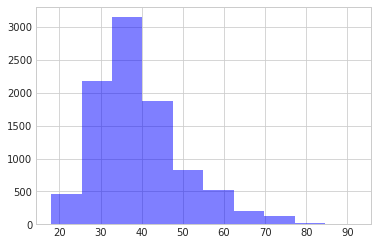

In [28]:
# What's the distribution of 'Age'? Normal (Gaussian) or non normal distribution (Poisson, Welbull...)
x = data['Age']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

The strategy for dealing with NaN's is mean or median imputation (depending on the distribution) and labeling NaN's.

Conclusion: Definitely not Gaussian. Thus, I'll impute with Median.

In [29]:
# What's the 'Age' Median?
data['Age'].median()

38.0

In [30]:
# Replace NaN's in Age with Median (38.1 - just to make sure not to label existing 38 with 1)
data['Age'].fillna(value=38.1, inplace=True)

In [31]:
# Label (1,0) NaN's in 'Age' with 38.1
data['NAN_Age'] = np.where(data['Age'] == 38.1, 1,0)

In [32]:
data['NAN_Age'].head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
Name: NAN_Age, dtype: int64

# Numerical Variables

In [33]:
# Find numerical variables
numerical = [var for var in data.columns if data[var].dtype!= 'O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [34]:
# View all numerical variables
data[numerical].head(3)

,RowNumber,Customer_ID,Rating,Age,Tenure,Balance,Products,Credit_Card,Activity,Salary,Exited,NAN_Age
0,1,15634602,619,42.0,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,608,41.0,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,502,42.0,8,159660.80,3,1,0,113931.57,1,0


# Checking for Outliers (II)
Detecting outliers is unfortunately more of an art than science. The famous statistician John Tukey proposed as IQR 1.5 as a “outlier”. Hence, the upper fence is 75% + (IQR 1.5).

In my experience, Logistic Regression works fine with IQR * 1.5, but not with IQR * 3. So I check for IQR * 3.

In [35]:
# Max value
data['Balance'].max()

250898.09

In [36]:
# Min value
data['Balance'].min()

0.0

In [37]:
# Calculating outlier values according to Tunkey's fence
IQR_2 = data.Balance.quantile(0.75) - data.Balance.quantile(0.25)

Lower_fence_2 = data.Balance.quantile(0.25) - (IQR_2 * 3)
Upper_fence_2 = data.Balance.quantile(0.75) + (IQR_2 * 3)

In [38]:
Upper_fence_2, Lower_fence_2, IQR_2

(510576.96, -382932.72000000003, 127644.24)

In [39]:
# How many outliers do we have?
data[data['Balance'] >510576].apply(lambda x: x.count())

RowNumber     NaN
Customer_ID   NaN
Rating        NaN
Geography     NaN
Gender        NaN
Age           NaN
Tenure        NaN
Balance       NaN
Products      NaN
Credit_Card   NaN
Activity      NaN
Salary        NaN
Exited        NaN
NAN_Age       NaN
dtype: float64

SUMMARY:
- Rating: 0
- Age: 0
- Balance: 0
- Products: 0
- Credit_Card: 0
- Salary: 0

# Categorical Encoding of Gender

In [40]:
# Replace Female with 1 and Male with 0
data['Gender'].replace(['Female','Male'],[1,0],inplace=True)

# Concatenating Categorical + Numerical Data in Pandas

In [41]:
X = data._get_numeric_data()

In [42]:
X.drop(['RowNumber', 'Customer_ID', 'Exited'], axis=1, inplace=True)

In [43]:
X.head(2)

,Rating,Gender,Age,Tenure,Balance,Products,Credit_Card,Activity,Salary,NAN_Age
0,619,1,42.0,2,0.00,1,1,1,101348.88,0
1,608,1,41.0,1,83807.86,1,0,1,112542.58,0


In [44]:
y = data['Exited']

In [45]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

# Split Data into Training and Test Sets
I split the training and test sets 80% to 20%.

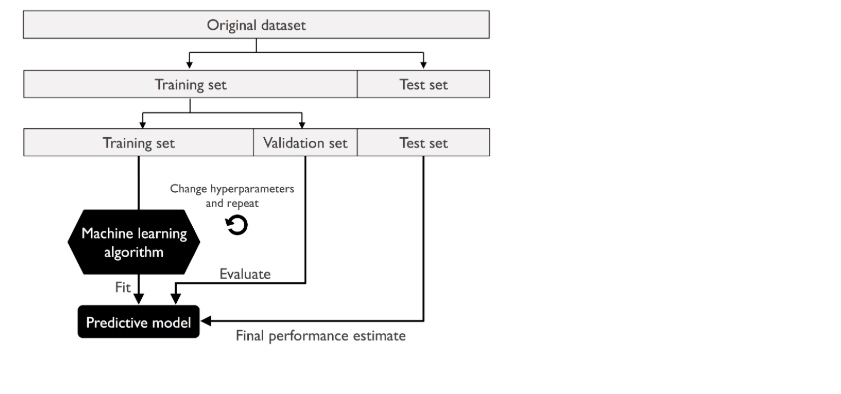

In [46]:
validation_size = 0.2
seed = 12
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [47]:
num_fold = 10
kfold = KFold(n_splits=10, random_state=12)
seed = 12

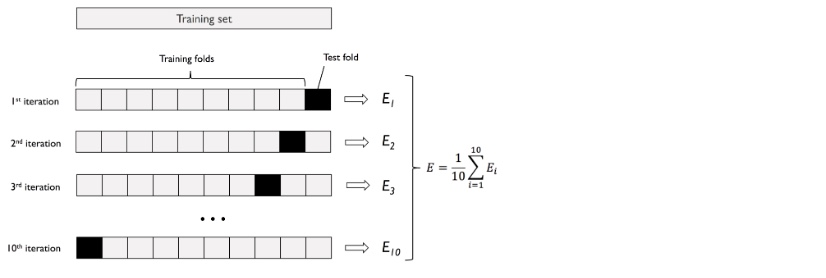

# Normalization
There are two common approaches to bring different features onto the same scale: normalization and standardization. Normalization calculates mean - min / max - min. "Standardization or Min-Max scaling?" There is no obvious answer to this question: it really depends on the application. 

In [48]:
# MinMaxScalre
mms = MinMaxScaler()

In [49]:
# Avoid date leakage by scaling train and test seperately
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# Machine Learning Algorithm

In [95]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.95, fit_intercept=True, 
                           intercept_scaling=1, class_weight="balanced", random_state=12, 
                           solver='warn', max_iter=100, multi_class='warn', verbose=0, 
                           warm_start=False, n_jobs=None)

# C = 0.95. C is the inverse of regularization strength. Large values of C give more freedom (higher variance).
# L2 Regularization adds a penalty to the cost function -> in less extreme weight values.
# class_weight = "balanced" will automatically weigh classes inversely proportional to their frequency
# Random state = 12 as always for the pseudorandom number generator.

In [96]:
model.fit(X_train_norm, y_train)

LogisticRegression(C=0.95, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=12,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

# K-fold Cross-Validation
The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data. In the example below we use 10-fold cross-validation:

In [97]:
from sklearn.model_selection import learning_curve

In [98]:
num_folds = 3
seed = 12

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(model, X_test_norm, y_test, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 68.251% (1.618%)


Conclusion: A test with XGBoost confirmed that the problem is partially non-linear. Thus, XGBoost gave an accuracy of around 80%. While Logistic Regression probably will not disappoint in production (due to high bias and low variance), the accuracy is low. Ideally, we'd have an accuracy in Churn Prediction of >85%. But sadly, that's often not possible ...

# Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm. For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual = 1. And so on.

In [99]:
# make predictions for test data
y_pred = model.predict(X_test_norm)
predictions = [round(value) for value in y_pred]

In [100]:
from sklearn.metrics import classification_report
predicted = model.predict(X_test_norm)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1564
           1       0.41      0.70      0.52       436

   micro avg       0.71      0.71      0.71      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.79      0.71      0.73      2000



Conclusion: the model's specificity (recall 0) and sensitivity (recall 1) are almost identical - which is good. I'd prefer a weighted avg of recall >0.75 though.

# Area Under ROC Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.

Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

The example below provides a demonstration of calculating AUC.

In [101]:
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.710 (0.013)


Comment: AUC is OK. OK = 70%-75%, Good = 75% - 80%, Great = >80%

# Diagnosing bias and variance problems with learning curves
By plotting the model training and validation accuracies as functions of the training set size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help address the problem.

In [102]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(penalty='l2', dual=False, 
                            tol=0.0001, C=0.95, fit_intercept=True, intercept_scaling=1, class_weight="balanced",
                            random_state=12, solver='warn', max_iter=100, multi_class='warn', verbose=0, 
                                                                           warm_start=False, n_jobs=None), 
                                                        X = X_train_norm, 
                                                        y = y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        n_jobs=-1)

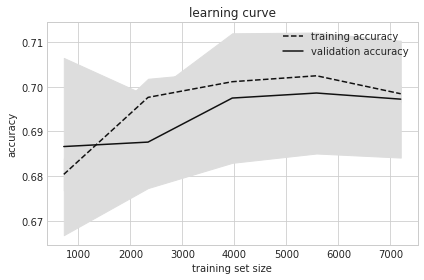

In [103]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="training accuracy")
plt.plot(train_sizes, test_mean, color="#111111", label="validation accuracy")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("learning curve")
plt.xlabel("training set size"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Comment: Looks like we have enough data. As expected from Logistic Regression, we have a high bias and low variance. Tuning C does not change results.

# Extract Intercept + Coefficients from Logistic Regression for Tableau

In [130]:
model.intercept_

array([-1.68737832])

In [131]:
model.coef_

array([[-0.33397082,  0.57694847,  5.48143804, -0.04987937,  1.1758968 ,
        -0.24351137, -0.05531058, -0.85952306,  0.02908427, -0.62117771]])